# Part II - (Bay Wheels Bike Sharing System Usage Pattern)
## by (Jonah Okiru)


## Investigation Overview
> The goals of the prsentations is as follows; firstly is to display the durations of the trips during days of the week, the second goal is to display the weekly usage of the service by users and the last goal is to display the variations of the trips durations during the days of the week among users.
> As seen from the explorations, the usage of the services shows several patterns. The first pattern is that the subscribers use the services mainly on the week days i.e monday to friday. On the other hands the customers use the services mainly on the weekend i.e saturday and sunday. The second pattern is is the concentration of the trips. In the week days the subscribers use the services mainly to and from workplace , which is the reason for high concentration from 08 hours to o9 hours and from 17 hours to 18 hours on the week days. While on the other hand, the subscribers use the services mainly in the late afternoon hours mostly for leisure purposes. The third pattern is the hour of the day with long duration of the trips, it was interestingly to found out it's 03 hours.
## Dataset Overview
> The dataset has 183412 records. The dataset columns is as follows; seven columns is of float data types, two columns is of integer data type and lastley seven columns is of object data type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# #Load the dataset
df=pd.read_csv('fordgobike_tripdata.csv')


## Data cleaning

In [3]:
# Drop the nissing records
df.dropna(inplace=True)

The missing records are sropped since they represent less than 5% of the variable data.

In [4]:
# Fixed the columns datatypes
# Convert the start time and end time from str datatype to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# convert start_station_id, end_station_id and bike_id  to str
df['start_station_id']= df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

# Convert user type and member gender to categorical
df['user_type'] = df['user_type']. astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [5]:
# Add columns start day of the week, duration in minutes, start hour of the day, start month and also start day of the week
df['duration_minutes'] = df['duration_sec']/ 60
df['start_hour_of_day'] = df['start_time'].dt.strftime('%H')
df['the_start_date'] = df['start_time'].dt.strftime('%Y-%m-%d')
df['start_day_week'] = df['start_time'].dt.strftime('%A')
df['start_month'] = df['start_time'].dt.strftime('%B')

In [6]:
# Add columns end day of the week, end hours of the day, end month and end day of the week
df['end_hour_of_day'] = df['end_time'].dt.strftime('%H')
df['the_end_date'] = df['end_time'].dt.strftime('%Y-%m-%d')
df['end_day_week'] = df['end_time'].dt.strftime('%A')
df['end_month'] = df['end_time'].dt.strftime('%B')

In [7]:
# Drop the columns of start_time and End_time
df.drop(columns=['start_time', 'end_time'], axis=1, inplace=True)


## (Durations of the trip during day of a week)
> The duration of the trips during the week days is a bit shorter compared to the weekends. In the week days most of the users of the services are subscribed users and they tend to use the services mostly for to and from their workplaces so they mostly used for specific purposes. While on the weekend the users of the services are the customers who normally uses the services for the leisure and other purposes, so they don't have specific use of the services hence the long duration of the trips on the weekend.

In [8]:
# Order the days of the week and convert it into category data type
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_week'] = df['start_day_week'].astype(weekdaycat)

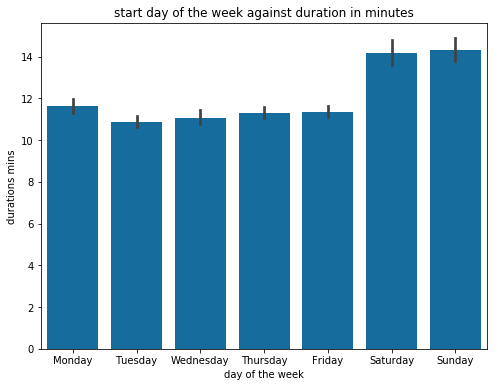

In [9]:
# bivariate barpplot of start day of the week  against the duration in minutes
# set fig size
plt.rcParams['figure.figsize'] = (8, 6)
#Set the color for the plots
base_color = sb.color_palette('colorblind')[0]
# The plots
sb.barplot(data=df, x='start_day_week', y='duration_minutes', color=base_color)
plt.title('start day of the week against duration in minutes')
plt.xlabel('day of the week')
plt.ylabel('durations mins')
plt.show()
    
    

## (Bike sharing system weekly usage by user type(customers and subscribers))

> Generally there were more subscriber users than the customers all throughout the week. The usage of the bikes over week days was higher than the weekend. The subscribers prefer to use the system mostly during the week days comapre to the weekends. This is beacause they mostly use the services mostly for going to and back from work. On the other hand the usage of the bike among the customers was higher during the weekends. Since they prefer to use it purpose and other leisure activities.

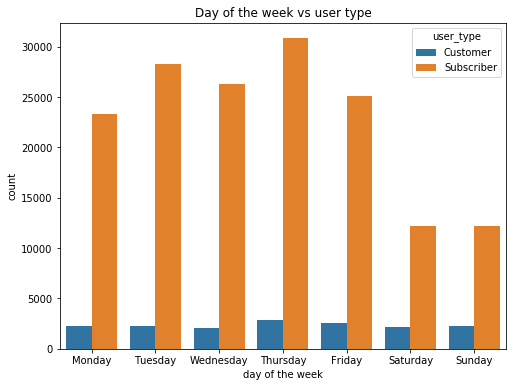

In [10]:
# Clustered barplot of start day of the week vs user type
sb.countplot(data=df, x='start_day_week', hue='user_type')
plt.title('Day of the week vs user type')
plt.xlabel('day of the week')
plt.ylabel('count')
plt.show()

## The Variation of the trips durations  during the days of the week among user types)

> The subscribers take short duration on each day trips compared to customers whom take slightly longer time on each day trip. The range of duration of each day for subscribers is small compared to customers whose range is abit huge.


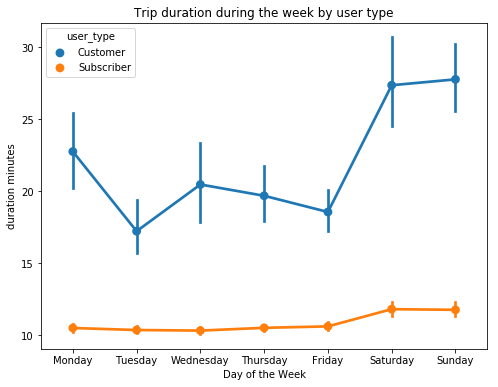

In [11]:
# The point plot of the variation of the trips during week days among users.
sb.pointplot(data=df, x='start_day_week', y='duration_minutes', hue='user_type');
plt.title('Trip duration during the week by user type')
plt.xlabel('Day of the Week');
plt.ylabel('duration minutes');
plt.show()